In [29]:
import warnings
warnings.filterwarnings('ignore')

import urllib, json
from urllib.request import urlopen
import numpy as np
from io import open
import ast
import time
import requests
import pandas as pd

from IPython.core.display import HTML,display
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


from collections import Counter

In [30]:
w = np.load("/Users/dk/dev/proj/research_policy/um50/um_openalex.npy", allow_pickle=True)

In [31]:
um_staff = {2004:798, 2005:934, 2006: 1022, 2007: 1037, 2008: 1040, 2009: 923, 2010: 865, 2011: 907, 2012: 869, 2013: 860,
            2014: 871, 2015: 889, 2016: 888, 2017: 908, 2018: 915, 2019: 940, 2020: 940, 2021: 960, 2022: 977, 2023: 1004}

In [164]:
num_cit = {}
num_works = {}
num_institutions = {}
num_inst = {}
list_inst = {}
for year in range(1990, 2022):
    for work in w:
        if work["publication_year"] == year:
            if year not in num_works:
                num_works[year] = 1
                num_cit[year] = work["cited_by_count"]
                countries = []
                for author in work['authorships']:
                    countries.append(author['countries'])
                    # flatten the list of countries
                    #countries = [item for sublist in countries for item in sublist]
                    #if 'institutions' in author.keys():
                    vec_inst = []
                    if 'institutions' in author.keys():
                        for institution in author['institutions']:
                            vec_inst.append(institution['display_name'])
                num_inst[year] = len(list(set(vec_inst)))
                list_inst[year] = vec_inst

                vec_country = []
                for cn in countries:
                    if cn:
                        for cntry in cn:
                            vec_country.append(cntry)
                #num_institutions[year] = len(list(set(vec_country)))
                num_institutions[year] = list(set(vec_country))

            else:
                num_works[year] += 1
                num_cit[year] += work["cited_by_count"]
                countries = []
                for author in work['authorships']:
                    countries.append(author['countries'])
                    # flatten the list of countries
                    #countries = [item for sublist in countries for item in sublist]

                if 'institutions' in author.keys():
                    vec_inst = []
                    for institution in author['institutions']:
                        vec_inst.append(institution['display_name'])
                num_inst[year] += len(list(set(vec_inst)))
                list_inst[year].extend(vec_inst)
                
                vec_country = []
                for cn in countries:
                    if cn:
                        for cntry in cn:
                            vec_country.append(cntry)
                #num_institutions[year] += len(list(set(vec_country)))
                num_institutions[year].extend(list(set(vec_country)))

In [128]:
list_inst[1995]

['University of Maribor',
 'Kranj School Centre',
 'Jožef Stefan Institute',
 'University of Maribor',
 'University of Ljubljana',
 'University of Maribor',
 'University of Maribor',
 'University of Maribor',
 'University of Maribor',
 'Jožef Stefan Institute',
 'University of Ljubljana',
 'University of Maribor',
 'University of Maribor',
 'Montanuniversität Leoben',
 'University of Maribor',
 'Hebrew University of Jerusalem',
 'University of Kragujevac',
 'University of Maribor',
 'University of Ljubljana',
 'University of Maribor',
 'University of Maribor',
 'University of Maribor',
 'University of Maribor',
 'University of Maribor',
 'Ministry of Health',
 'Max Planck Society',
 'University of Victoria',
 'Graz University of Technology',
 'University of Maribor',
 'University of Maribor',
 'University of Maribor',
 'University of Graz',
 'University of Maribor',
 'Pinus TKI (Slovenia)',
 'University of Maribor',
 'University of Ljubljana',
 'University of Maribor',
 'University of 

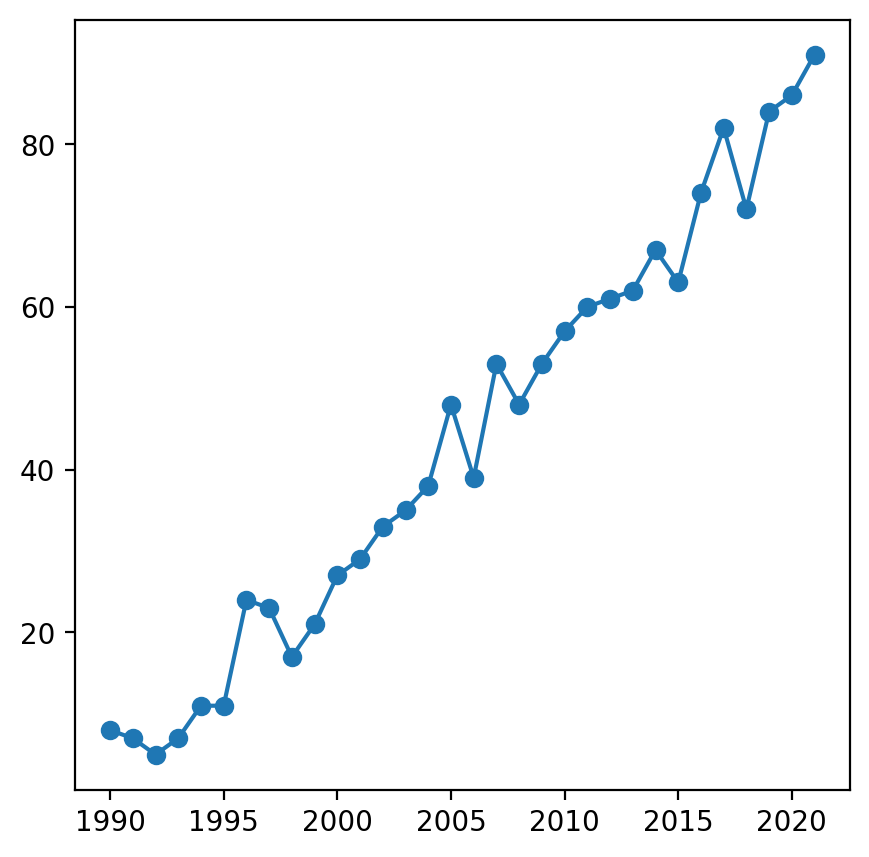

In [166]:
# unique countries as unique_countries
unique_countries = {}
for year in num_institutions.keys():
    unique_countries[year] = len(list(set(num_institutions[year])))

# unique_institutions as unique_institutions
unique_institutions = {}
for year in num_inst.keys():
    unique_institutions[year] = len(list(set(list_inst[year])))

plt.figure(figsize=(5, 5))
# plot unique_institutions
plt.plot(unique_countries.keys(), unique_countries.values(), marker='o')
#plt.plot(unique_institutions.keys(), unique_institutions.values(), marker='o')


In [138]:
len(list(Counter(list_inst[2021]).keys()))

377

Text(0, 0.5, 'Number of unique institutions')

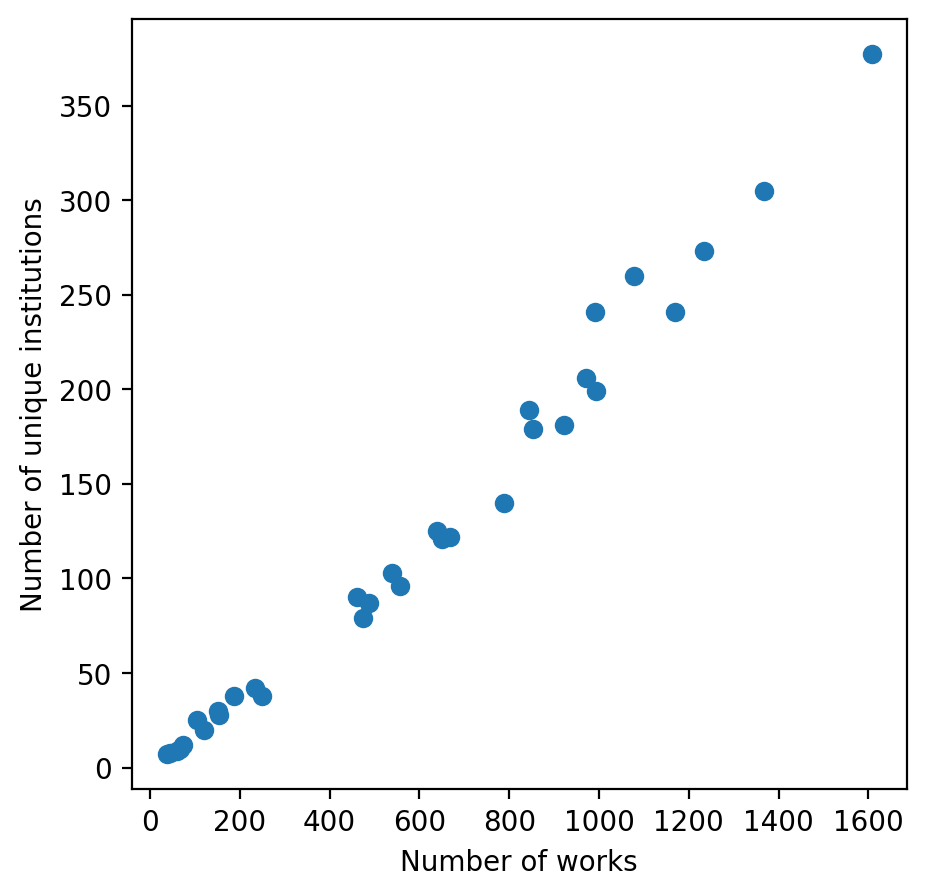

In [177]:
# plot unique_institutions on y-axis and num_works on x-axis
plt.figure(figsize=(5, 5))
plt.scatter(num_works.values(), unique_institutions.values(), marker='o')
plt.xlabel('Number of works')
plt.ylabel('Number of unique institutions')


(0.0, 0.29)

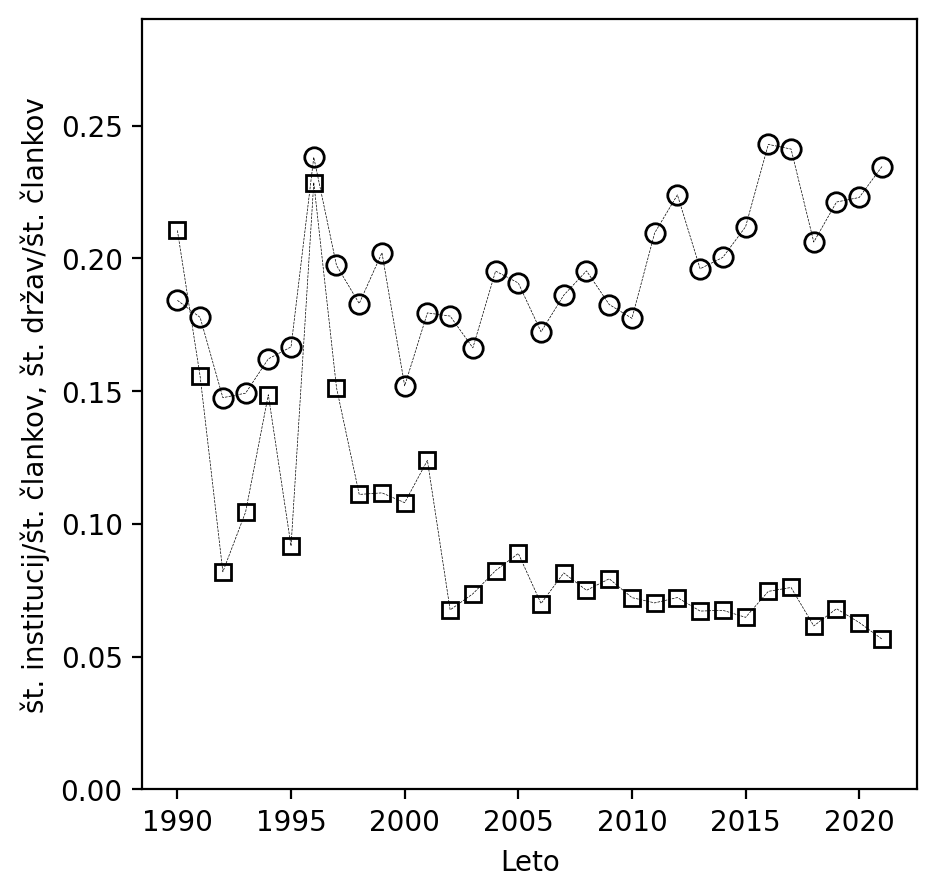

In [176]:
# plot ration of unique_institutions to num_works
plt.figure(figsize=(5, 5))
plt.plot(num_works.keys(), np.array(list(unique_institutions.values()))/np.array(list(num_works.values())), marker='o', color="black", mfc="none", ls='--', lw=.25, ms=7)
plt.plot(num_works.keys(), np.array(list(unique_countries.values()))/np.array(list(num_works.values())), marker='s', color="black", mfc="none", ls='--', lw=.25, ms=6)

plt.xlabel('Leto')
plt.ylabel('št. institucij/št. člankov, št. držav/št. člankov')
#plt.xlim(1991.3, 2022)
plt.ylim(0.0, .29)

'"\nmax_countries = max(unique_countries.values())\nax2.plot(num_works.keys(), np.array(list(unique_countries.values()))/max_countries, marker=\'s\', color="lightgrey", ls=\'--\', lw=.25, ms=6, \n         # marker alpha\n         alpha=1.0, label=\'št. držav/št. člankov\',\n         mec = \'black\')\nax2.plot(num_works.keys(), np.array(list(unique_countries.values()))/max_countries, marker=\'\', color="black", ls=\'--\', lw=.25, ms=6,\n         # marker alpha\n         alpha=1.0, label=\'št. držav/št. člankov\',\n         mec = \'black\')\nax2.set_ylabel(\'norm. št. institucij, norm. št. držav\')"\n'

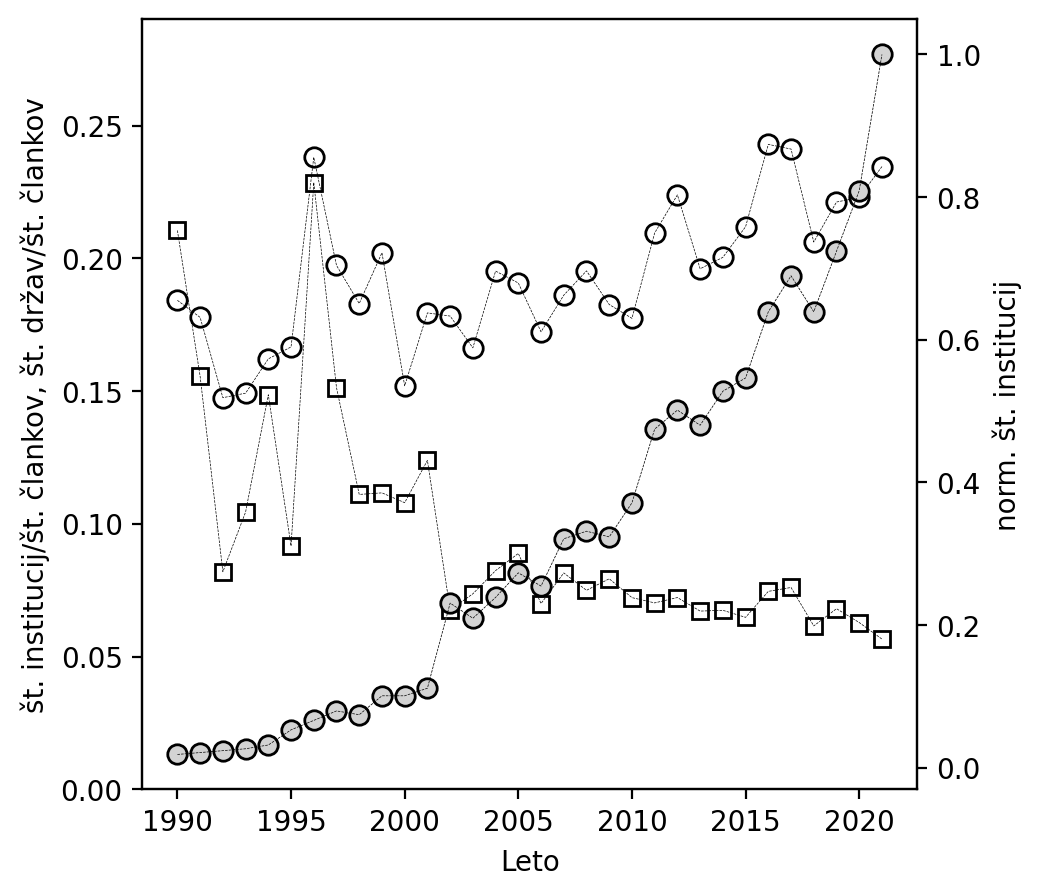

In [190]:
# plot ratio of unique_institutions to num_works and num_countries to num_works and unique_institutions with another y-axis
fig, ax1 = plt.subplots(figsize=(5, 5))
ax2 = ax1.twinx()
ax1.plot(num_works.keys(), np.array(list(unique_institutions.values()))/np.array(list(num_works.values())), marker='o', color="black", mfc="none", ls='--', lw=.25, ms=7)
ax1.plot(num_works.keys(), np.array(list(unique_countries.values()))/np.array(list(num_works.values())), marker='s', color="black", mfc="none", ls='--', lw=.25, ms=6)
ax1.set_xlabel('Leto')
ax1.set_ylabel('št. institucij/št. člankov, št. držav/št. člankov')
ax1.set_ylim(0.0, .29)
max_inst = max(unique_institutions.values())
ax2.plot(num_works.keys(), np.array(list(unique_institutions.values()))/max_inst, marker='o', color="lightgrey", ls='--', lw=.25, ms=7, 
         # marker alpha
         alpha=1.0, label='št. institucij/št. člankov',
         mec = 'black')

ax2.plot(num_works.keys(), np.array(list(unique_institutions.values()))/max_inst, marker='', color="black", ls='--', lw=.25, ms=7, 
         # marker alpha
         alpha=1.0, label='št. institucij/št. člankov',
         mec = 'black')
ax2.set_ylabel('norm. št. institucij')
""""
max_countries = max(unique_countries.values())
ax2.plot(num_works.keys(), np.array(list(unique_countries.values()))/max_countries, marker='s', color="lightgrey", ls='--', lw=.25, ms=6, 
         # marker alpha
         alpha=1.0, label='št. držav/št. člankov',
         mec = 'black')
ax2.plot(num_works.keys(), np.array(list(unique_countries.values()))/max_countries, marker='', color="black", ls='--', lw=.25, ms=6,
         # marker alpha
         alpha=1.0, label='št. držav/št. člankov',
         mec = 'black')
ax2.set_ylabel('norm. št. institucij, norm. št. držav')"
"""


In [140]:
corr = np.corrcoef(list(num_works.values()), list(unique_institutions.values()))
corr[0][1]
corr_countries = np.corrcoef(list(num_works.values()), list(unique_countries.values()))

In [141]:
corr_countries[0][1]

np.float64(0.9841951160075889)

In [121]:
Counter(list_inst[2021]).most_common(10)

[('University of Maribor', 1136),
 ('University Clinical Centre Maribor', 132),
 ('University of Ljubljana', 98),
 ('Alma Mater Europaea', 20),
 ('University of Primorska', 20),
 ('Institute of Mathematics, Physics, and Mechanics', 19),
 ('Jožef Stefan Institute', 15),
 ('China Medical University', 14),
 ('Ljubljana University Medical Centre', 14),
 ('Complexity Science Hub Vienna', 12)]

Text(0, 0.5, 'Št. institucij')

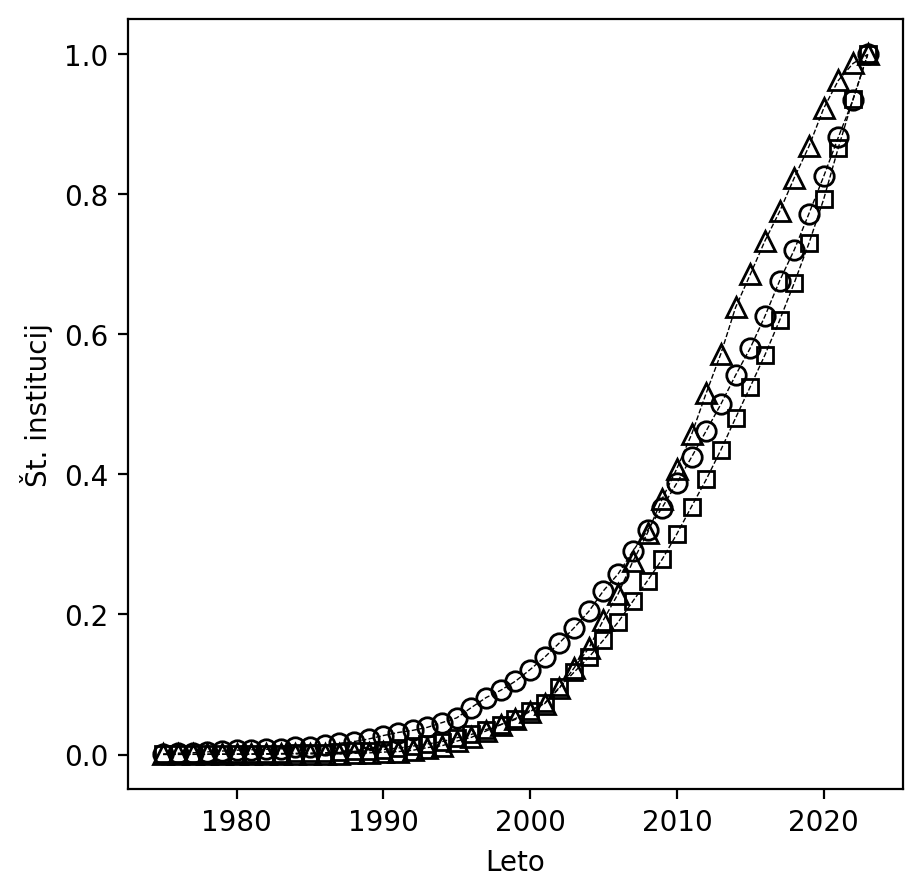

In [93]:
# plot cumulative num_institutions
num_institutions = unique_institutions
num_institutions = dict(sorted(num_institutions.items(), key=lambda item: item[0]))
cumulative_num_institutions = {}
for year in num_institutions:
    if year == 1975:
        cumulative_num_institutions[year] = num_institutions[year]
    else:
        cumulative_num_institutions[year] = cumulative_num_institutions[year - 1] + num_institutions[year]


# cumulative num_works
cumulative_num_works = {}
for year in num_works:
    if year == 1975:
        cumulative_num_works[year] = num_works[year]
    else:
        cumulative_num_works[year] = cumulative_num_works[year - 1] + num_works[year]
# cumulative num_cit
cumulative_num_cit = {}
for year in num_cit:
    if year == 1975:
        cumulative_num_cit[year] = num_cit[year]
    else:
        cumulative_num_cit[year] = cumulative_num_cit[year - 1] + num_cit[year]

# normalize num_institutions by max num_institutions
max_num_institutions = max(cumulative_num_institutions.values())
for year in cumulative_num_institutions:
    cumulative_num_institutions[year] = cumulative_num_institutions[year] / max_num_institutions
# normalize num_works by max num_works
max_num_works = max(cumulative_num_works.values())
for year in cumulative_num_works:
    cumulative_num_works[year] = cumulative_num_works[year] / max_num_works
# normalize num_cit by max num_cit
max_num_cit = max(cumulative_num_cit.values())
for year in cumulative_num_cit:
    cumulative_num_cit[year] = cumulative_num_cit[year] / max_num_cit

plt.figure(figsize=(5, 5))
plt.plot(list(cumulative_num_institutions.keys()), np.array(list(cumulative_num_institutions.values())), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
plt.plot(list(cumulative_num_works.keys()), list(cumulative_num_works.values()), marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.plot(list(cumulative_num_cit.keys()), list(cumulative_num_cit.values()), marker='^', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
plt.xlabel('Leto')
plt.ylabel('Št. institucij')
#plt.yscale('log')   